In [50]:
from gmpy2 import random_state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix
from sklearn.datasets import load_diabetes, load_iris
import pandas as pd
import numpy as np
import warnings
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")


# Performance Metrics for Classification

In [51]:
# Load the dataset
iris = load_iris()

# Create the DataFrame
# Features as columns, samples as rows
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Define features (X) and target (y)
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Split the dataset into training and testing sets
# stratify=y ensures that the proportion of species is maintained in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

LR_model = LogisticRegression(max_iter=200, random_state=42)
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)

## 0. Confusion Matrix

<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/JingYung047/ml/main/images/confusion_matrix.png" alt="Confusion Matrix" width="500" height="500">
</div>

### Component Definitions

<table style="border-collapse: collapse; width: 80%; text-align: left;">
  <thead>
    <tr style="background-color: #2d2d2d; color: #ffffff;">
      <th style="padding: 8px; border: 1px solid #444;">Term</th>
      <th style="padding: 8px; border: 1px solid #444;">Full Name</th>
      <th style="padding: 8px; border: 1px solid #444;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding: 8px; border: 1px solid #444;"><b>TP</b></td>
      <td style="padding: 8px; border: 1px solid #444;">True Positives</td>
      <td style="padding: 8px; border: 1px solid #444;">The model correctly predicted the <b>Positive</b> class.</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #444;"><b>TN</b></td>
      <td style="padding: 8px; border: 1px solid #444;">True Negatives</td>
      <td style="padding: 8px; border: 1px solid #444;">The model correctly predicted the <b>Negative</b> class.</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #444;"><b>FP</b></td>
      <td style="padding: 8px; border: 1px solid #444;">False Positives</td>
      <td style="padding: 8px; border: 1px solid #444;">The model incorrectly predicted the <b>Positive</b> class (Type I Error).</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #444;"><b>FN</b></td>
      <td style="padding: 8px; border: 1px solid #444;">False Negatives</td>
      <td style="padding: 8px; border: 1px solid #444;">The model incorrectly predicted the <b>Negative</b> class (Type II Error).</td>
    </tr>
  </tbody>
</table>

</div>


In [52]:
cm = confusion_matrix(y_test, y_pred)

## 1. Accuracy

Accuracy is used to measure the prediction correctness of a model across the entire dataset. It refers to the ratio of the number of samples correctly classified by the model to the total number of samples.

Accuracy is typically used to evaluate the model's overall performance.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

### Basic Principle

Accuracy measures the ratio of correctly predicted samples to the total number of samples. It reflects how well a model performs across the entire dataset. However, when the dataset is imbalanced (that is, when one class has significantly more samples than others), accuracy may not be a good evaluation metric, because even if the model predicts all samples as belonging to the majority class, it can still achieve a relatively high accuracy.

### Key Points

- Accuracy is an indicator used to measure the overall performance of a classification model.

- It represents the ratio of correctly classified samples to the total number of samples.

- When dealing with imbalanced datasets, accuracy may not be a good metric.


In [53]:
Accuracy = accuracy_score(y_test, y_pred)

## 2. Precision

Precision measures the proportion of correctly predicted positive samples among all samples predicted as positive.

Precision represents the ratio of correctly classified positive samples to all samples predicted as positive. It can be calculated using the following formula:

$$\text{Precision} = \frac{TP}{TP+FP}$$

### Basic Principle

The core idea of precision is to measure, among all samples predicted as positive by the model, the proportion that is truly positive.
This metric is particularly useful in tasks where correctly identifying positive cases is important — for example, detecting diseases in medical diagnosis.

A higher precision indicates that the model performs well in identifying positive samples.

### Key Points

- Precision measures the proportion of true positive samples among all samples predicted as positive.

- It is especially important in tasks where correctly identifying positive samples is critical.

In [54]:
precision = precision_score(y_test, y_pred, average='weighted')
print(f'{precision:.4f}')

0.9697


## 3. Recall (Also known as Sensitivity or True Positive Rate)

It measures the proportion of actual positive samples that are correctly predicted by the model.

It represents the ratio of correctly predicted positive samples to all actual positive samples.
The formula is as follows:

$$\text{Recall} = \frac{TP}{TP+FN}$$

### Basic Principles

The core idea of recall is to measure the model’s ability to identify positive samples.

It emphasizes how well the model recognizes actual positive cases.

For tasks where missing positive cases must be minimized — such as disease diagnosis — recall is an especially important evaluation metric.

### Key Points

- Recall measures the proportion of actual positive samples that are correctly predicted as positive.

- In tasks that require minimizing missed detections (e.g., disease screening), recall is a very important metric.

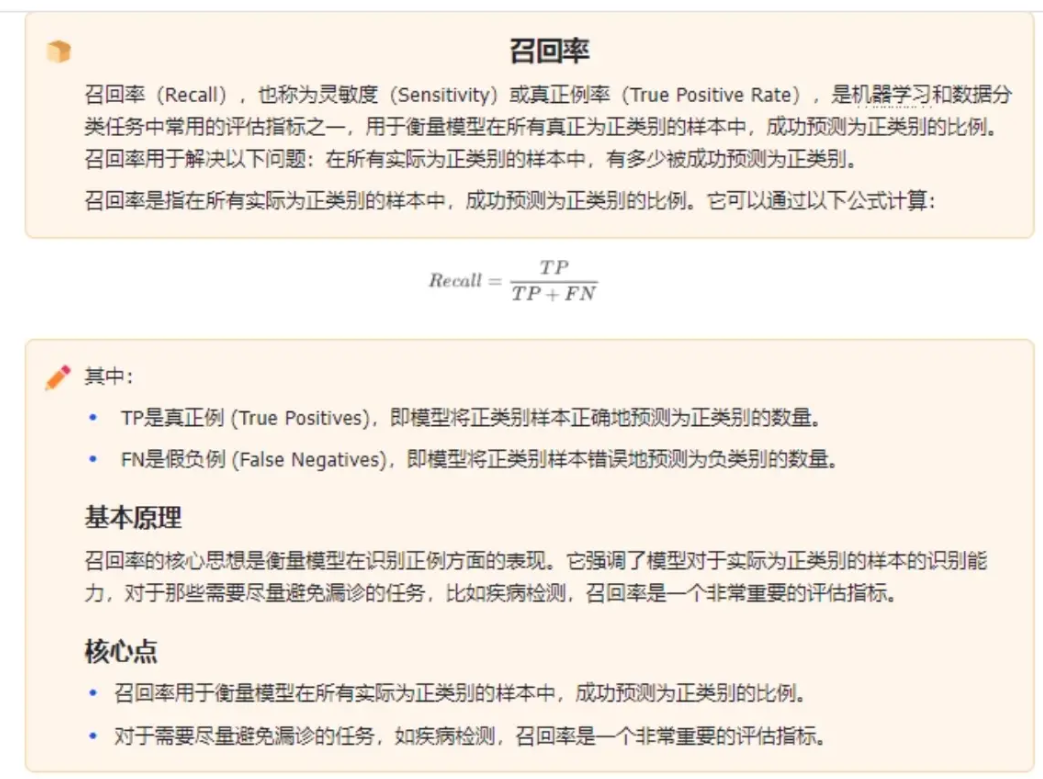

In [55]:
recall = recall_score(y_test, y_pred, average='weighted')
print(f'{recall:.4f}')

0.9667


## 4. F1 Score

The F1 score is the harmonic mean of Precision and Recall, used to measure the model’s overall ability to identify and predict positive samples.

It can be calculated using the following formula:

$$\text{F1 Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} +  \text{Recall}}$$

### Basic Principles

The F1 score takes both Precision and Recall into account.

Therefore, it can compensate for the limitations of using either metric alone.

A higher F1 score indicates that the model achieves a better balance between identifying and predicting positive samples.

### Key Points

- It reflects the model’s combined performance in identifying and predicting positive samples.

- A higher F1 score means the model’s overall performance is better.

In [56]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"{f1:.4f}")

0.9666


## 5. ROC Curve and AUC

They are based on the True Positive Rate (TPR), also known as Recall, and the False Positive Rate (FPR), and describe the model’s performance under different threshold settings.

- X-axis: False Positive Rate (FPR)

- Y-axis: True Positive Rate (TPR / Recall)

AUC represents the area under the ROC curve and is used to quantify the classifier’s performance.

The value of AUC ranges from 0 to 1 — generally, a larger AUC indicates better model performance.

### Basic Principle

The ROC curve is based on the true positive rate and false positive rate, showing how the model performs in identifying positive and negative samples at various threshold values.

The closer the points on the ROC curve are to the upper-left corner, the better the model’s performance.

AUC, which measures the area under the ROC curve, quantifies the model’s overall discriminative ability.

It can be used to compare the performance of different models — the larger the AUC, the better the model.

### Key Points

- The ROC curve describes the model’s performance under different classification thresholds.

- AUC is the area under the ROC curve and is used to quantify model performance.

- The closer the ROC curve is to the upper-left corner, the better the model’s performance.

$$
TPR = \frac{TP}{TP+FN}
$$

$$
FPR = \frac{FP}{FP+TN}
$$


<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/JingYung047/ml/main/images/sphx_glr_plot_roc_002.png" alt="ROCAUC" width="600" height="500">
</div>

# Performance Metrics for Regression

In [67]:
# Load data
diabetes = load_diabetes(as_frame=True)
diabetes_df = diabetes.frame

X = diabetes_df.drop('target', axis=1)
y = diabetes_df['target']

# Split the dataset (stratify is not used in general regression splitting)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
)

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

## 1. R-Squared ($R^2$)

It is used to measure the degree to which the model fits the data. An $R^2$ value closer to 1 indicates a better fit of the model to the data, and a value closer to 0 indicates a poor fit.

R-Squared measures the model's fit by calculating the difference between the actual values and the predicted values.

The calculation formula for $R^2$ is:

$$R^{2} = 1 - \frac{\sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2}}{\sum_{i=1}^{n}(y_{i} - \bar{y})^{2}}$$

### Key Principle

- R-Squared measures the degree to which the model fits the data, and its value typically ranges from 0 to 1.

- When the model fits the data well, $R^2$ approaches 1.

- When the model fits the data poorly, $R^2$ approaches 0.

- If the model's fit is comparable to a random guess (i.e., just predicting the mean), $R^2$ may be zero or, in some cases, negative.

### Key Points

- R-Squared is used to measure the goodness of fit of a regression model to the data.

- An $R^2$ value closer to 1 indicates a better fit of the model to the data.



In [70]:
R2 = r2_score(y_test, y_pred)
print(f'{R2:.4f}')

0.4526


## 2. Mean Square Error (MSE)

It is used to measure the average squared difference between the model's predicted values and the true values. A smaller MSE indicates a better fit of the model to the data.

MSE is a measure of model performance calculated by finding the average of the squared errors between the predicted value and the true value. For regression tasks, MSE is the mean of the squared loss function.

It can be calculated using the following formula:

$$\text{MSE} = \frac{1}{n}\sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}$$

### Basic Principle

- MSE measures the average squared deviation between the model's predicted values and the true values.

- When the deviation between the model's predicted values and the true values is large, the MSE will increase.

- When the deviation is small, the MSE will decrease.

- Therefore, a smaller MSE indicates a better fit of the model to the data.

### Key Points

- MSE is used to measure the average of the squares of the prediction error between the model's predicted value and the true value.

- A smaller MSE indicates a better fit of the model to the data.

## 3. Mean Absolute Error (MAE)

It is used to measure the average absolute difference between the model's predicted values and the true values. A smaller MAE indicates a better fit of the model to the data.

MAE is a measure of model performance calculated by finding the average of the absolute differences between the predicted value and the true value. For regression tasks, MAE is the mean of the absolute loss function.

It can be calculated using the following formula:

$$\text{MAE} = \frac{1}{n}\sum_{i=1}^{n} |y_{i} - \hat{y}_{i}|$$

### Basic Principle

- MAE measures the average absolute deviation between the model's predicted values and the true values.

- When the deviation between the model's predicted values and the true values is large, the MAE will increase.

- When the deviation is small, the MAE will decrease.

- Therefore, a smaller MAE indicates a better fit of the model to the data.

### Key Points

- MAE is used to measure the average of the absolute prediction error between the model's predicted value and the true value.

- A smaller MAE indicates a better fit of the model to the data.